In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Tässä harjoituksessa kokeilen, miten algoritmit osaavat
# luokitella kolmen, saman alueen italialaisen viinintuottajan viinit. 
# En tiedä mikä alue (Piemonte tms.) tai mitkä rypäleet ovat kyseessä. 
# Lähde ja lisätiedot: https://archive.ics.uci.edu/ml/datasets/Wine
df=pd.read_excel('http://taanila.fi/wine.xlsx')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df.rename(columns = {'X1': 'alkohol', 'X2': 'malic acid', 'X3': 'ash', 'X4': 'alcal or ash', 'X5': 'magn',
                    'X6' : 'tot phenols', 'X7': ' flavan', 'X8' : 'non-fl phenols',
                    'X9' : 'proanthoc', 'X10' : 'color intens',
                    'X11': 'Hue', 'X12': 'ODs of dil wines',
                    'X13': 'Proline'}, inplace = True)
df.head()

,Y,alkohol,malic acid,ash,alcalinity or ash,magnesium,total phenols,flavanoids,non-flavanoid phenols,proanthocyanins,color intensity,Hue,ODs of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
#jostain syystä alla oleva uusi lyhennys ei onnistu, uudelleennimeämiset jäävät voimaan. 
df.rename(columns = {'X1': 'alkohol', 'X2': 'malic acid', 'X3': 'ash', 'X4': 'alcal or ash', 'X5': 'magn',
                    'X6' : 'tot phenols', 'X7': ' flavan', 'X8' : 'non-fl phenols',
                    'X9' : 'proanthoc', 'X10' : 'color intens',
                    'X11': 'Hue', 'X12': 'ODs of dil wines',
                    'X13': 'Proline'}, inplace = True)
df.head()

,Y,alkohol,malic acid,ash,alcalinity or ash,magnesium,total phenols,flavanoids,non-flavanoid phenols,proanthocyanins,color intensity,Hue,ODs of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
X = df.drop('Y',axis=1)
X.head()

,alkohol,malic acid,ash,alcalinity or ash,magnesium,total phenols,flavanoids,non-flavanoid phenols,proanthocyanins,color intensity,Hue,ODs of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
from sklearn.cluster import KMeans
malli = KMeans(n_clusters = 3)
malli.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
malli.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [19]:
X['K'] = malli.predict(X)
X

,alkohol,malic acid,ash,alcalinity or ash,magnesium,total phenols,flavanoids,non-flavanoid phenols,proanthocyanins,color intensity,Hue,ODs of diluted wines,Proline,K
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,0
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0


In [20]:
# ylläolevasta silmämääräisesti katsottuna Proline eli tietty aminohappo 
# näyttäisi olevan yksi luokittelutekijä. Ainakin kaikissa 0-luokan viinissä on Prolinea yli 1000 yksikköä.
# alla ristiintaulukointi
pd.crosstab(X['K'],'lkm')

col_0,lkm
K,
0,47
1,62
2,69


In [21]:
X.groupby('K').describe().T

K                                      0           1           2
 flavanoids           count    47.000000   62.000000   69.000000
                      mean      3.014255    1.584032    1.758406
                      std       0.420407    0.960581    0.850848
                      min       2.190000    0.470000    0.340000
                      25%       2.715000    0.692500    1.250000
                      50%       2.980000    1.265000    1.750000
                      75%       3.295000    2.590000    2.250000
                      max       3.930000    3.750000    5.080000
Hue                   count    47.000000   62.000000   69.000000
                      mean      1.078298    0.883968    0.941159
                      std       0.118401    0.229971    0.252543
                      min       0.860000    0.540000    0.480000
                      25%       1.015000    0.685000    0.780000
                      50%       1.070000    0.885000    0.920000
                      75%       1.160000    1.055000    1.100000
                      max       1.310000    1.310000    1.710000
ODs of diluted wines  count    47.000000   62.000000   69.000000
                      mean      3.114043    2.365484    2.490725
                      std       0.358273    0.766090    0.673986
                      min       2.510000    1.270000    1.300000
                      25%       2.850000    1.687500    2.010000
                      50%       3.000000    2.280000    2.570000
                      75%       3.385000    3.115000    3.100000
                      max       4.000000    3.820000    3.690000
Proline               count    47.000000   62.000000   69.000000
                      mean   1195.148936  728.338710  458.231884
                      std     171.608627   94.832543   79.943941
                      min     970.000000  600.000000  278.000000
                      25%    1055.000000  652.500000  406.000000
                      50%    1150.000000  702.500000  470.000000
...                                  ...         ...         ...
malic acid            std       0.547874    1.184280    1.262772
                      min       1.350000    0.940000    0.740000
                      25%       1.655000    1.615000    1.510000
                      50%       1.730000    2.260000    2.130000
                      75%       1.880000    3.352500    3.430000
                      max       4.040000    5.650000    5.800000
non-flavanoid phenols count    47.000000   62.000000   69.000000
                      mean      0.285319    0.388387    0.390145
                      std       0.067174    0.135902    0.123258
                      min       0.170000    0.130000    0.170000
                      25%       0.250000    0.282500    0.280000
                      50%       0.290000    0.390000    0.400000
                      75%       0.315000    0.495000    0.480000
                      max       0.500000    0.630000    0.660000
proanthocyanins       count    47.000000   62.000000   69.000000
                      mean      1.910426    1.503387    1.451884
                      std       0.443974    0.584401    0.561998
                      min       1.250000    0.410000    0.420000
                      25%       1.555000    1.072500    1.040000
                      50%       1.950000    1.435000    1.420000
                      75%       2.160000    1.852500    1.760000
                      max       2.960000    3.280000    3.580000
total phenols         count    47.000000   62.000000   69.000000
                      mean      2.867234    2.111129    2.070725
                      std       0.366895    0.582496    0.562066
                      min       2.200000    1.100000    0.980000
                      25%       2.600000    1.657500    1.630000
                      50%       2.850000    1.965000    2.000000
                      75%       3.050000    2.600000    2.480000
                      max       3.8

In [23]:
pd.crosstab(X['K'], df['Y'])

Y,1,2,3
K,,,
0,46,1,0
1,13,20,29
2,0,50,19


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

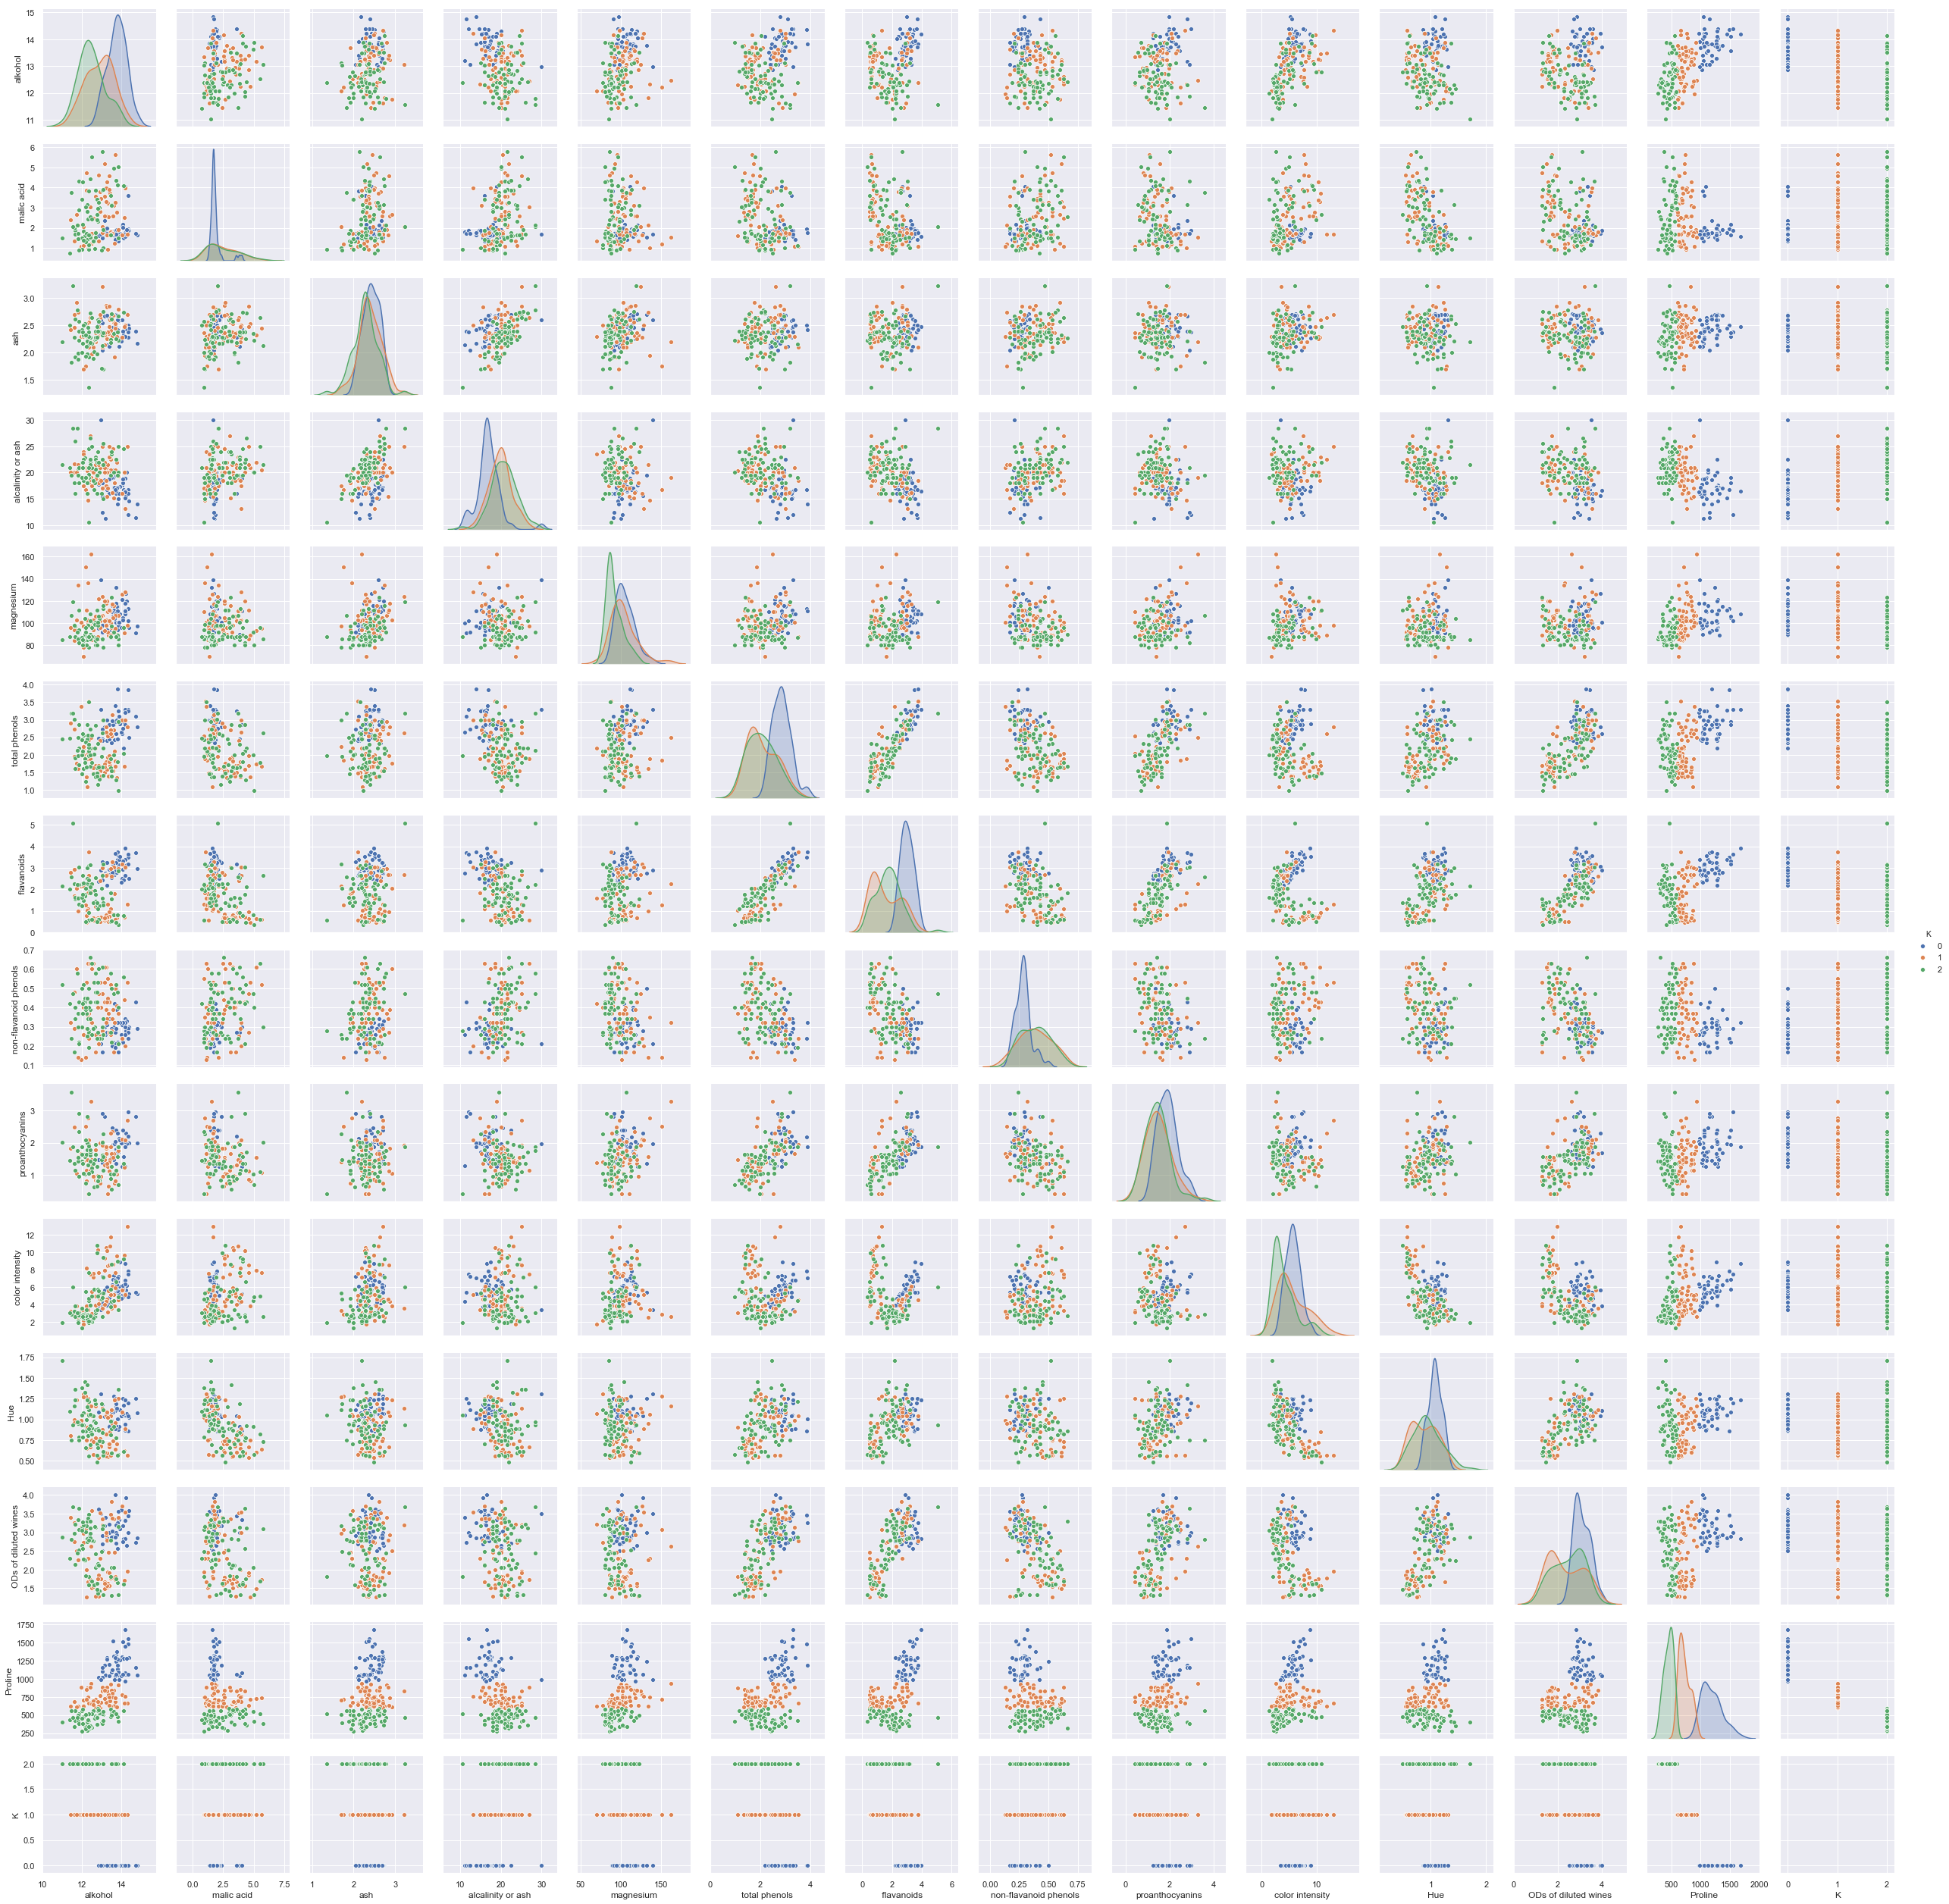

In [24]:
sns.pairplot(X, hue='K')

Ylläoleva kuvio tulostui hyvin pienenä, mutta Prolinesta eli proliinista eli 2-pyrrolidiinikarboksyylihaposta (C5H9NO2) aiempana päättelemäni seikka näkyy hyvin toiseksi alimmalla kuviorivillä. Viinit erottuvat toisistaan sillä rivillä selkeästi. Proantosyanidit (kuudes rivi alhaalta päin) ovat vähiten merkittäviä erottelevia tekijöitä. Myöskään tuhkapitoisuus (kolmanneksi ylin kuviorivi) ei ole lainkaan merkittävä, mikä on ymmärrettävää: se ei liity viinin luontaisiin ominaisuuksiin, vaan on tullut tuotteeseen ulkopuolelta, kasvupaikalta tai rypäleitä ja/tai viiniä käsiteltäessä, kypsytettäessä, varastoinnissa jne. Olisi hauska tietää, osuiko kone oikeaan.